In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from datetime import date,datetime

In [2]:
# downloading data of the stocks where pair trading will be performed
data = yf.download("ICICIBANK.NS",start="2016-01-01",end="2020-10-31")["Adj Close"]
data1= yf.download("KOTAKBANK.NS",start="2016-01-01",end="2020-10-31")["Adj Close"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Date
2016-01-01    225.718262
2016-01-04    219.324341
2016-01-05    220.311325
2016-01-06    214.646896
2016-01-07    211.771820
Name: Adj Close, dtype: float64

In [4]:
data1.head()

Date
2016-01-01    724.767944
2016-01-04    702.892761
2016-01-05    705.334473
2016-01-06    701.198608
2016-01-07    689.289368
Name: Adj Close, dtype: float64

In [5]:
#creating dataframe where close price of the stocks is considered  
DF = pd.DataFrame({"ICICIBANK":data,
                  "KOTAKBANK":data1})
DF

,ICICIBANK,KOTAKBANK
Date,,
2016-01-01,225.718262,724.767944
2016-01-04,219.324341,702.892761
2016-01-05,220.311325,705.334473
2016-01-06,214.646896,701.198608
2016-01-07,211.771820,689.289368
...,...,...
2020-10-26,400.863647,1415.344727
2020-10-27,406.314880,1585.907349
2020-10-28,392.538086,1549.647095


In [6]:
# we will compute the correlation between stocks if correlation is above 0.80 then only proceed further
DF.corr()

,ICICIBANK,KOTAKBANK
ICICIBANK,1.000000,0.929678
KOTAKBANK,0.929678,1.000000


In [7]:
# calculating the price difference
DF["diff"] = DF["KOTAKBANK"] - DF["ICICIBANK"]

In [8]:
DF

,ICICIBANK,KOTAKBANK,diff
Date,,,
2016-01-01,225.718262,724.767944,499.049683
2016-01-04,219.324341,702.892761,483.568420
2016-01-05,220.311325,705.334473,485.023148
2016-01-06,214.646896,701.198608,486.551712
2016-01-07,211.771820,689.289368,477.517548
...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079
2020-10-27,406.314880,1585.907349,1179.592468
2020-10-28,392.538086,1549.647095,1157.109009


<AxesSubplot:xlabel='Date'>

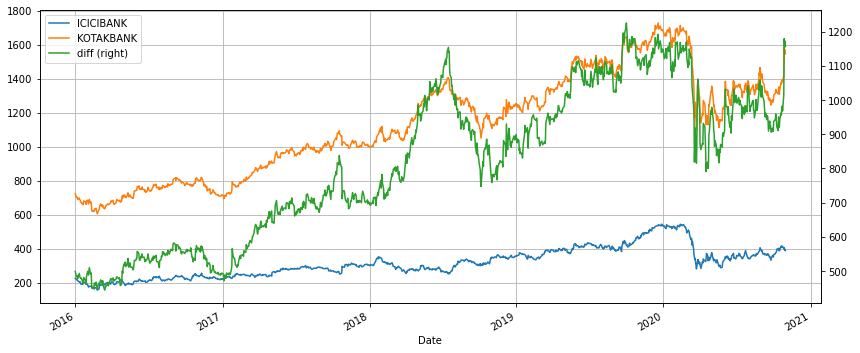

In [9]:
# plotting close prices of the stock and difference
DF.plot(grid=True,secondary_y="diff",figsize=(14,6))

Following steps for computation of returns -

1) Compute the MA of difference of  stocks. We will compute 5 days MA.

2) Compute SD of difference of stocks.

3) We Know 1 std covers 66% of the values.

4) If price difference will move more than 1SD from its mean value then there is high probability that diff will revert to mean.

5) Upper band = MA + 1 SD

6) Lower band = MA - 1 SD

7) When diff crosses upper band we short the diff(short kotak and long icicibank) if prices revert to mean, squareoff the position.

8) When diff crosses lower band we buy the diff(buy kotak and short icicibank) if prices revert to mean, squareoff the position.

In [10]:
# moving average calculation 
DF["Moving_Average"] = DF["diff"].rolling(5).mean()

In [11]:
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average
Date,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102
...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755


In [12]:
# calculating std of difference of the prices
DF["Moving_std_dev"] = DF["diff"].rolling(5).std()
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev
Date,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209
...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332


In [14]:
# calcualting upper band 
DF["UpperBand"] = DF["Moving_Average"] + DF["Moving_std_dev"]

In [15]:
# calcualting lower band 
DF["LowerBand"] = DF["Moving_Average"] - DF["Moving_std_dev"]

In [16]:
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand
Date,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893
...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423


<AxesSubplot:xlabel='Date'>

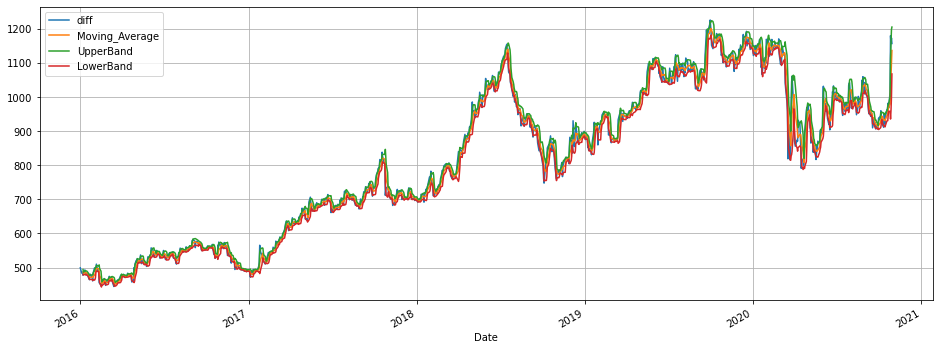

In [17]:
DF[["diff","Moving_Average","UpperBand","LowerBand"]].plot(grid=True,figsize=(16,6))

import plotly.express as px
Table = DF[["diff","Moving_Average","UpperBand","LowerBand"]]
fig=px.line(Table)
fig.show()

**Computing Profit and Loss of the strategy**

In [18]:
DF["positions_short"] = np.nan
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short
Date,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,NaN
...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,NaN
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,NaN
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,NaN


In [19]:
DF["positions_long"] = np.nan
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long
Date,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,NaN,NaN
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,NaN,NaN
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,NaN,NaN


In [20]:
# running for loop and marking down if difference is above upper band mark it as -1(short) and difference below lower band mark it as1(long)
# if difference between lower band and upper band mark it as 0(no position)

for x in range(len(DF)):
    if DF["diff"][x] < DF["LowerBand"][x]:
        DF["positions_long"][x]=1
    if DF["diff"][x] >= DF["Moving_Average"][x]:
        DF["positions_long"][x]=0
    if DF["diff"][x] > DF["UpperBand"][x]:
        DF["positions_short"][x] = -1
    if DF["diff"][x] <= DF["Moving_Average"][x]:
        DF["positions_short"][x]=0
        

In [21]:
# filling na with ffill method
DF["positions_long"] = DF["positions_long"].fillna(method="ffill")
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long
Date,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,NaN,0.0


In [22]:
DF["positions_short"] = DF["positions_short"].fillna(method="ffill")
DF


,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long
Date,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0


In [23]:
# total position = long +short 
DF["positions"] = DF["positions_short"] + DF["positions_long"]
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions
Date,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0


In [24]:
# calculating the price difference of difference
DF["price_difference"] = DF["diff"]-DF["diff"].shift(1)
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference
Date,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459


In [29]:
# calculating pnl 
DF["pnl"] = DF["positions"].shift(1)*DF["price_difference"]
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl
Date,,,,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026,0.0,0.000000,1048.241379
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389,-1.0,-165.111389,883.129990
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459,-1.0,22.483459,905.613449


In [30]:
#calculating cumalative pnl
DF["cumpnl"] = DF["pnl"].cumsum()

In [31]:
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl
Date,,,,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026,0.0,0.000000,1048.241379
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389,-1.0,-165.111389,883.129990
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459,-1.0,22.483459,905.613449


**In this strategy "cumpnl" is the cumulated profit and loss of the strategy that is  Rs.906/- per share.**

<AxesSubplot:xlabel='Date'>

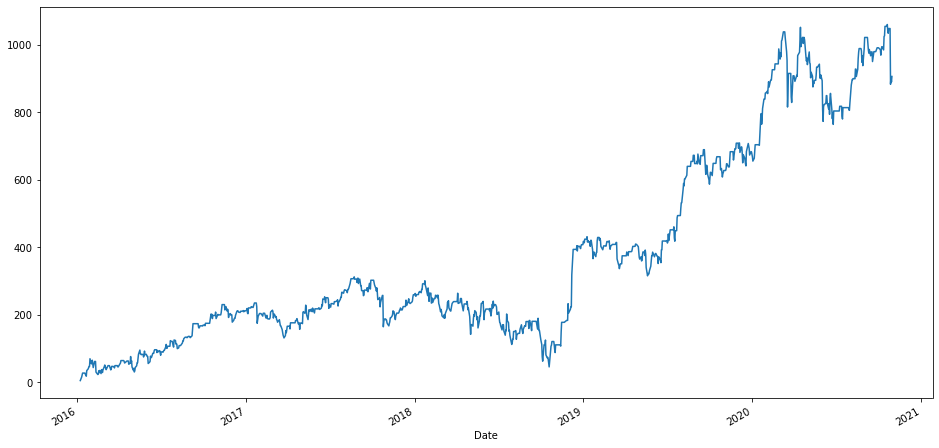

In [32]:
DF["cumpnl"].plot(figsize=(16,8))

**Drawdown of the strategy**

In [33]:
DF["rolling_max"] = DF["cumpnl"].rolling(250,min_periods=1).max()
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl,rolling_max
Date,,,,,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026,0.0,0.000000,1048.241379,1060.146469
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389,-1.0,-165.111389,883.129990,1060.146469
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459,-1.0,22.483459,905.613449,1060.146469


In [34]:
DF["daily_drawdown"] = DF["cumpnl"] - DF["rolling_max"]

In [35]:
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl,rolling_max,daily_drawdown
Date,,,,,,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026,0.0,0.000000,1048.241379,1060.146469,-11.905090
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389,-1.0,-165.111389,883.129990,1060.146469,-177.016479
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459,-1.0,22.483459,905.613449,1060.146469,-154.533020


In [36]:
DF["max_daily_drawdown"] = DF["daily_drawdown"].rolling(250,min_periods=1).min()

In [37]:
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl,rolling_max,daily_drawdown,max_daily_drawdown
Date,,,,,,,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026,0.0,0.000000,1048.241379,1060.146469,-11.905090,-287.674194
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389,-1.0,-165.111389,883.129990,1060.146469,-177.016479,-287.674194
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459,-1.0,22.483459,905.613449,1060.146469,-154.533020,-287.674194


**Maximum drawdown in this strategy is approx 287 points.**

In [38]:
DF["Trade"] = DF["positions"].diff()

In [39]:
DF

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl,rolling_max,daily_drawdown,max_daily_drawdown,Trade
Date,,,,,,,,,,,,,,,,,,
2016-01-01,225.718262,724.767944,499.049683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,219.324341,702.892761,483.568420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.481262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,220.311325,705.334473,485.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.454727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,214.646896,701.198608,486.551712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.528564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,211.771820,689.289368,477.517548,486.342102,7.887209,494.229311,478.454893,0.0,1.0,1.0,-9.034164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,400.863647,1415.344727,1014.481079,979.322760,21.854597,1001.177357,957.468163,-1.0,0.0,-1.0,46.202026,0.0,0.000000,1048.241379,1060.146469,-11.905090,-287.674194,-1.0
2020-10-27,406.314880,1585.907349,1179.592468,1023.966461,88.778520,1112.744981,935.187942,-1.0,0.0,-1.0,165.111389,-1.0,-165.111389,883.129990,1060.146469,-177.016479,-287.674194,0.0
2020-10-28,392.538086,1549.647095,1157.109009,1060.348755,100.320332,1160.669087,960.028423,-1.0,0.0,-1.0,-22.483459,-1.0,22.483459,905.613449,1060.146469,-154.533020,-287.674194,0.0


In [40]:
T1 = DF.where(DF["Trade"]!=0)

In [41]:
T1 = T1.dropna()

In [42]:
T1

,ICICIBANK,KOTAKBANK,diff,Moving_Average,Moving_std_dev,UpperBand,LowerBand,positions_short,positions_long,positions,price_difference,PNL_1,pnl,cumpnl,rolling_max,daily_drawdown,max_daily_drawdown,Trade
Date,,,,,,,,,,,,,,,,,,
2016-01-11,205.506607,698.457947,492.951340,484.891718,5.662236,490.553954,479.229482,-1.0,0.0,-1.0,10.536499,1.0,10.536499,15.433792,15.433792,0.00000,0.000000,-2.0
2016-01-13,205.549515,686.797974,481.248459,484.116208,5.877111,489.993319,478.239097,0.0,0.0,0.0,-5.200394,-1.0,5.200394,27.136673,27.136673,0.00000,0.000000,1.0
2016-01-18,191.474304,665.122192,473.647888,480.288068,4.578159,484.866227,475.709908,0.0,1.0,1.0,-7.013229,0.0,-0.000000,27.136673,27.136673,0.00000,0.000000,1.0
2016-01-22,199.756378,680.718750,480.962372,471.375351,6.335075,477.710426,465.040276,-1.0,0.0,-1.0,16.588531,1.0,16.588531,34.451157,34.451157,0.00000,-9.274048,-2.0
2016-01-27,203.661377,672.297546,468.636169,471.571573,6.768289,478.339862,464.803283,0.0,0.0,0.0,-7.450989,-1.0,7.450989,46.777359,46.777359,0.00000,-9.274048,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-13,392.736328,1343.473633,950.737305,932.153290,16.400327,948.553617,915.752962,-1.0,0.0,-1.0,39.745605,1.0,39.745605,1024.575516,1051.854996,-27.27948,-287.674194,-2.0
2020-10-15,387.532928,1308.112671,920.579742,930.288385,18.161042,948.449427,912.127343,0.0,0.0,0.0,-28.091980,-1.0,28.091980,1054.733078,1054.733078,0.00000,-287.674194,1.0
2020-10-19,413.401489,1375.188843,961.787354,944.854285,15.253932,960.108217,929.600353,-1.0,0.0,-1.0,19.292053,0.0,0.000000,1054.733078,1054.733078,0.00000,-287.674194,-1.0


In [43]:
T1["Trade_Return"] = (T1["cumpnl"].diff()/T1["diff"])*100


In [44]:
print("Number of Trade count",round(len(T1)/2))

Number of Trade count 192


<AxesSubplot:xlabel='Date'>

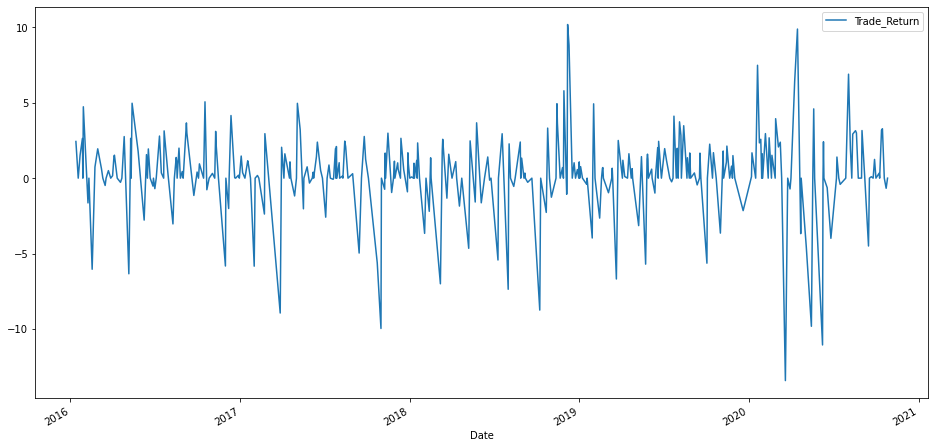

In [45]:
T1[["Trade_Return"]].plot(figsize=(16,8))

**Max Profit was 10 % and Max loss was -10%**

In [46]:
T1.to_csv("Pair_TradingBacktesting.csv")

In [48]:
DF.to_csv("PPPPPair_TradingBacktesting.csv")